In [48]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import sklearn.preprocessing as skpreprocess
import sklearn.decomposition as skdecompose
import sklearn.manifold as skmanifold
import sklearn.linear_model as sklinear

Populating the interactive namespace from numpy and matplotlib


## Index
* [Load and scale the data](#Load-and-scale-the-data)
* [Reduce to 2D and plot](#Reduce-to-2D-and-plot)
* [Crosstab analysis](#Crosstab-analysis)
    * [Survive vs. Sex](#Sex)
    * [Survive vs. Pclass](#Pclass)
    * [Survive vs. Embarked](#Survive-vs.-Embarked)
    * [Survive vs. Age](#Survive-vs.-Age)

### Load and scale the data

In [49]:
titanic = pd.DataFrame.from_csv("train_processed.csv")
feature_names = ["Pclass","Age","SibSp","Parch","Fare","IsMale","EmbarkC","EmbarkQ","EmbarkS"]

Xtrain = titanic[feature_names]
ytrain = titanic["Survived"]

scaler = skpreprocess.StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)

### Reduce to 2D and plot

In [50]:
def plot2d(dimreducer,X,y):
    X2d = dimreducer.fit_transform(X)

    plt.figure()
    
    # have to change to ndarray, because now ndarray only "boolean index" when input is bool array
    # cannot be array-like object
    X2d_survived = X2d[np.asarray( y == 1),:]
    label = "%d survived"%(X2d_survived.shape[0])
    plt.scatter(X2d_survived[:,0],X2d_survived[:,1],label=label,alpha=0.5,color="b")

    X2d_died = X2d[np.asarray( y == 0),: ]
    label = "%d died"%(X2d_died.shape[0])
    plt.scatter(X2d_died[:,0],X2d_died[:,1],label=label,alpha=0.5,color="r")
    
    plt.legend(loc="best")

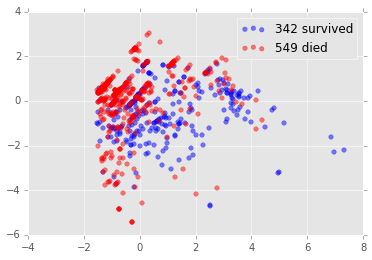

In [51]:
pca = skdecompose.PCA(n_components=2)
plot2d(pca,Xtrain_scaled,ytrain)

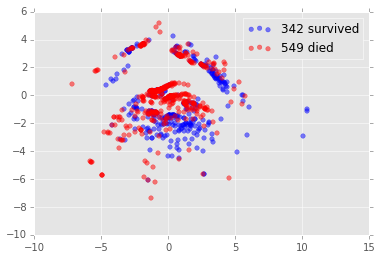

In [52]:
mds = skmanifold.MDS(n_components=2)
plot2d(mds,Xtrain_scaled,ytrain)

### Crosstab analysis

In [53]:
def cross_tab_plot(survived,feature,figsize=(10,4)):
    crosstab = pd.crosstab(survived,feature)
    print "**************** counts"
    print crosstab

    print "**************** Row decomposition"
    row_crosstab = crosstab.apply(lambda r: r/r.sum(),axis=1)
    print row_crosstab

    print "**************** Column decomposition"
    col_crosstab = crosstab.apply(lambda c: c/c.sum()).T
    print col_crosstab

    # ------------------ plot
    fig, axes = plt.subplots(1, 2,figsize=figsize)
    row_crosstab.plot(kind="bar",stacked=True,ax= axes[0])
    col_crosstab.plot(kind="bar",stacked=True,ax= axes[1])

#### Sex

**************** counts
Sex       female  male
Survived              
0             81   468
1            233   109
**************** Row decomposition
Sex         female      male
Survived                    
0         0.147541  0.852459
1         0.681287  0.318713
**************** Column decomposition
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


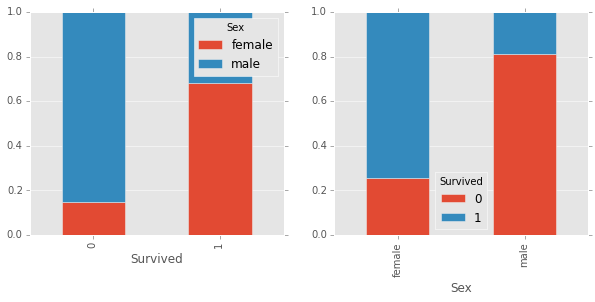

In [54]:
cross_tab_plot(titanic.Survived,titanic.Sex)

from above, we can see that, "Male" is easier to die in the disaster.

#### Pclass

**************** counts
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
**************** Row decomposition
Pclass           1         2         3
Survived                              
0         0.145719  0.176685  0.677596
1         0.397661  0.254386  0.347953
**************** Column decomposition
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


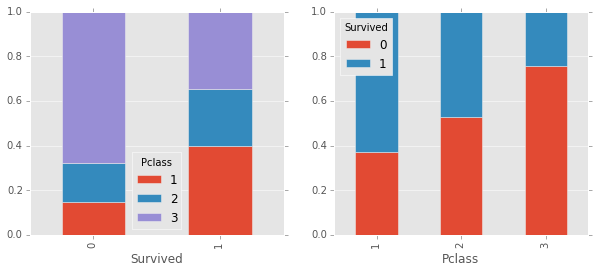

In [55]:
cross_tab_plot(titanic.Survived,titanic.Pclass)

from above, we can conclude that, the lower the class (higher in class number), easier to die.

#### Survive vs. Embarked

**************** counts
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219
**************** Row decomposition
Embarked         C         Q         S
Survived                              
0         0.136612  0.085610  0.777778
1         0.271930  0.087719  0.640351
**************** Column decomposition
Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660991  0.339009


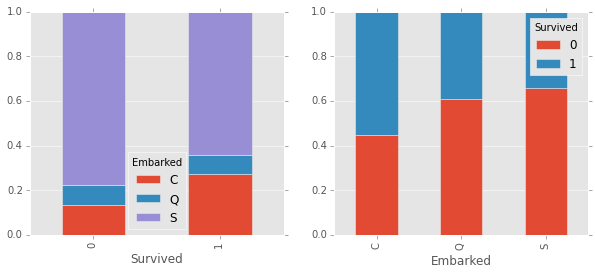

In [56]:
cross_tab_plot(titanic.Survived,titanic.Embarked)

from above, we can see that, it is eaiser to survive when embarked at "c", and easier to die when embarked at "s".

**************** counts
Embarked   C   Q    S
Sex                  
female    73  36  205
male      95  41  441
**************** Row decomposition
Embarked         C         Q         S
Sex                                   
female    0.232484  0.114650  0.652866
male      0.164645  0.071057  0.764298
**************** Column decomposition
Sex         female      male
Embarked                    
C         0.434524  0.565476
Q         0.467532  0.532468
S         0.317337  0.682663


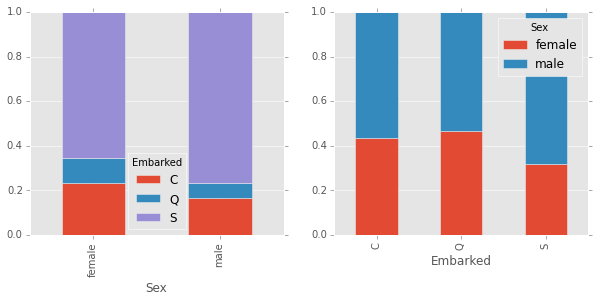

In [57]:
cross_tab_plot(titanic.Sex,titanic.Embarked,(10,4))

maybe above plots can explain why embarking on "s" is easier to die. because there more men embarking on "s".

#### Survive vs. Age

In [62]:
bins = [0,10,20,50,90]
age_bins = pd.cut(titanic.Age,bins,right=False)
age_bins.value_counts()

[20, 50)    653
[10, 20)    102
[50, 90)     74
[0, 10)      62
dtype: int64

**************** counts
Age       [0, 10)  [10, 20)  [20, 50)  [50, 90)
Survived                                       
0              24        61       417        47
1              38        41       236        27
**************** Row decomposition
Age        [0, 10)  [10, 20)  [20, 50)  [50, 90)
Survived                                        
0         0.043716  0.111111  0.759563  0.085610
1         0.111111  0.119883  0.690058  0.078947
**************** Column decomposition
Survived         0         1
Age                         
[0, 10)   0.387097  0.612903
[10, 20)  0.598039  0.401961
[20, 50)  0.638591  0.361409
[50, 90)  0.635135  0.364865


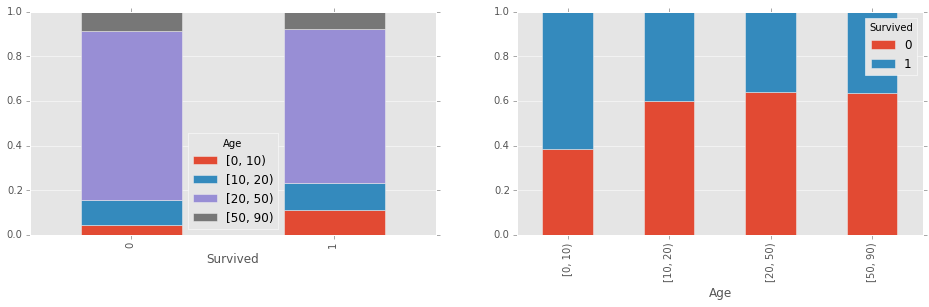

In [66]:
# pandas treat Categorical very differently from Series
# without astype("string"),there will be an error when plotting
# so I have to convert back to Series explicitly
cross_tab_plot(titanic.Survived,age_bins.astype("string"),(16,4))